 Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-27 21:15:24--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-27 21:15:24--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-27 21:15:24 (33.7 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-27 21:15:24--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (github

In [3]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X = np.load(path_X)
  y = np.load(path_y)
  # -------------------------------

  return X, y

In [4]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  D = X.shape[1]
  out_shape = y.shape[1]
  # -------------------------------
  
  W = np.random.randn(D, out_shape)

  return W

In [5]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  m = y.shape[0]
  error = np.dot((y-y_pred).T,(y-y_pred))/m
  # -------------------------------

  return error[0][0]

In [6]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  W = np.linalg.multi_dot([(np.linalg.inv(np.dot(X.T,X))),X.T,y])
  # -------------------------------

  return W

In [7]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  error_hist = []
  m = y.shape[0]
  W = get_linear_model(X,y)
  for i in range(epochs):
    y_pred = np.dot(X,W)
    error = MSE(y, y_pred)
    error_hist.append(error)
    dW = (2/m)*np.dot(X.T,(y_pred-y))         #gradients
    W = W - dW*lr                             #updating model parameters
    print("mean square error after ",i+1," epoch:",error)
  # -------------------------------

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

In [8]:
# Write your code here ----------
X,y = load_data_LR()
W = train_by_algebra(X,y)
y_pred = np.dot(X,W)
print(MSE(y,y_pred))

# -------------------------------

5.49005982064382


 ##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

mean square error after  1  epoch: 598.191277785577
mean square error after  2  epoch: 422.00899744471263
mean square error after  3  epoch: 298.1974478620622
mean square error after  4  epoch: 211.18926644677376
mean square error after  5  epoch: 150.04453755262398
mean square error after  6  epoch: 107.07526948236715
mean square error after  7  epoch: 76.87874998041782
mean square error after  8  epoch: 55.65823981159861
mean square error after  9  epoch: 40.745592286247536
mean square error after  10  epoch: 30.265775616140886
mean square error after  11  epoch: 22.901117043453272
mean square error after  12  epoch: 17.7256261355852
mean square error after  13  epoch: 14.088565995857628
mean square error after  14  epoch: 11.532633293921128
mean square error after  15  epoch: 9.736459536585947
mean square error after  16  epoch: 8.474204014719035
mean square error after  17  epoch: 7.587157872341731
mean square error after  18  epoch: 6.963788954499581
mean square error after  19  e

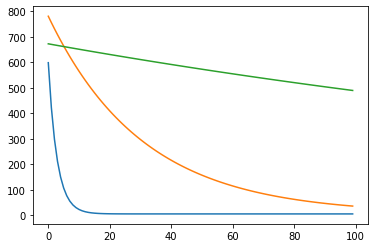

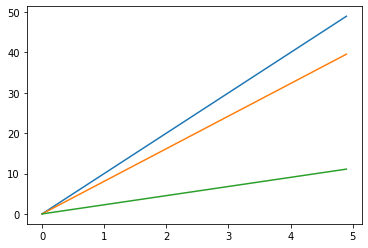

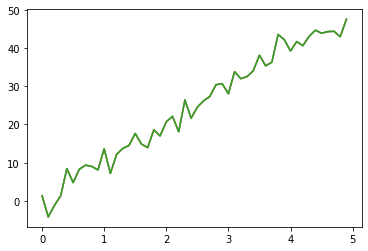

In [9]:
# Write your code here ----------
X,y = load_data_LR()
lr = [0.01, 0.001, 0.0001]
for i in lr:
  W,error_hist = train_by_GD(X,y,100,i)
  y_pred = np.dot(X,W)
  plt.figure(1)
  plt.plot(error_hist)
  plt.figure(2)
  plt.plot(X,y_pred)
  plt.figure(3)
  plt.plot(X,y)

  print(MSE(y,y_pred))
  


# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [12]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  (x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()
  # -------------------------------

  return x_train/255.0, y_train, x_test/255.0, y_test

 Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [13]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model = tf.keras.models.Sequential(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(7200,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(2304,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [14]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model =tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                                     tf.keras.layers.MaxPooling2D((2,2)),
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D((2,2)),
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D((2,2)),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(64,activation = 'relu'),
                                     tf.keras.layers.Dense(10,activation='softmax')])
  # -------------------------------

  return model

### Compile and train the fully connected neural network model using the above functions.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
98/98 [==============================] - 7s 36ms/step - loss: 2.0867 - accuracy: 0.2333 - val_loss: 1.8835 - val_accuracy: 0.3419
Epoch 2/10
98/98 [==============================] - 3s 33ms/step - loss: 1.8945 - accuracy: 0.3241 - val_loss: 1.7219 - val_accuracy: 0.3968
Epoch 3/10
98/98 [==============================] - 3s 33ms/step - loss: 1.7661 - accuracy: 0.3772 - val_loss: 1.6250 - val_accuracy: 0.4298
Epoch 4/10
98/98 [==============================] - 3s 33ms/step - loss: 1.6840 - accuracy: 0.4048 - val_loss: 1.5802 - val_accuracy: 0.4420
Epoch 5/10
98/98 [==============================] - 3s 33ms/step - loss: 1.6239 - accuracy: 0.4304 - val_loss: 1.5416 - val_accuracy: 0.4582
Epoch 6/10
98/98 [==============================] - 3s 33ms/step - loss: 1.5645 - accuracy: 0.4506 - val_loss: 1.4903 - val_accuracy: 0.4778
Epoch 7/10
98/98 [==============================] - 3s 33ms/step - loss: 1.5140 - accuracy: 0.4696 - val_loss: 1.4520 - val_accuracy: 0.4856
Epoch 8/10
98

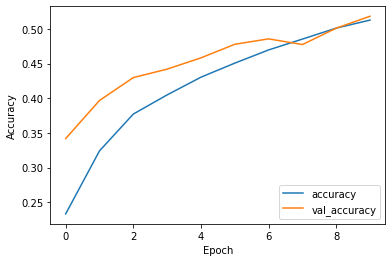

In [15]:
# Write your code here ----------
x_train,y_train,x_test,y_test=load_data_cifar10_norm()
model = build_fc_model()
model.compile(optimizer =tf.keras.optimizers.Adam(lr =0.0001),loss ='sparse_categorical_crossentropy',metrics =['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
98/98 [==============================] - 2s 19ms/step - loss: 1.8109 - accuracy: 0.3247 - val_loss: 1.5302 - val_accuracy: 0.4316
Epoch 2/10
98/98 [==============================] - 2s 16ms/step - loss: 1.4059 - accuracy: 0.4891 - val_loss: 1.3321 - val_accuracy: 0.5225
Epoch 3/10
98/98 [==============================] - 2s 16ms/step - loss: 1.2616 - accuracy: 0.5486 - val_loss: 1.2844 - val_accuracy: 0.5395
Epoch 4/10
98/98 [==============================] - 2s 15ms/step - loss: 1.1624 - accuracy: 0.5876 - val_loss: 1.1864 - val_accuracy: 0.5750
Epoch 5/10
98/98 [==============================] - 2s 16ms/step - loss: 1.0869 - accuracy: 0.6166 - val_loss: 1.0792 - val_accuracy: 0.6131
Epoch 6/10
98/98 [==============================] - 2s 16ms/step - loss: 1.0245 - accuracy: 0.6392 - val_loss: 1.1330 - val_accuracy: 0.5958
Epoch 7/10
98/98 [==============================] - 2s 16ms/step - loss: 1.0023 - accuracy: 0.6450 - val_loss: 1.0664 - val_accuracy: 0.6259
Epoch 8/10
98

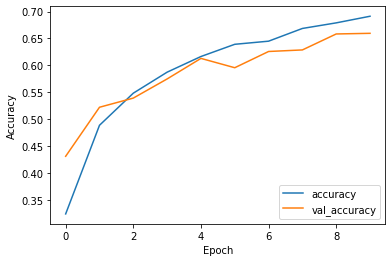

In [25]:
# Write your code here ----------
x_train,y_train,x_test,y_test = load_data_cifar10_norm()
model = build_cnn_model()
model.compile(optimizer =tf.keras.optimizers.Adam(lr=0.005),loss ='sparse_categorical_crossentropy',metrics =['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [24]:
print("In fc_model number of parameters were quite larger than the cnn_model on the other hand cnn provied more accuracy than fc model with even lesser number of parameters")

In fc_model number of parameters were quite larger than the cnn_model on the other hand cnn provied more accuracy than fc model with even lesser number of parameters
